In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

(4, 2) (4, 2) [0.25 0.25 0.25 0.25]


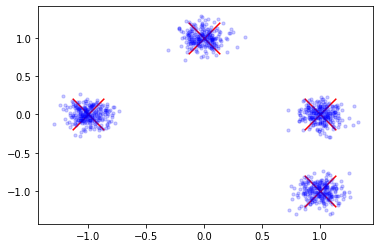

In [37]:
means = np.array([[1., 0.], [-1., 0], [0., 1.], [1, -1]])
stds = np.ones(8).reshape(4, 2)*.1
p = np.ones(4)/4.
print(means.shape, stds.shape, p)

def generate_data(n_samples):
    data = np.random.randn(n_samples, len(means), 2)
    data = data*stds+means
    
    idx = np.random.choice(np.arange(len(means)), size=n_samples, p=p)
    return data[np.arange(len(idx)), idx]
    
    
    
plt.scatter(*means.T, marker='x', color='r', s=1000)
x = generate_data(1000)
plt.scatter(*x.T, marker='o', color=(0, 0, 1., 0.2), s=10)
    


# k means clustering (teleport centroids)

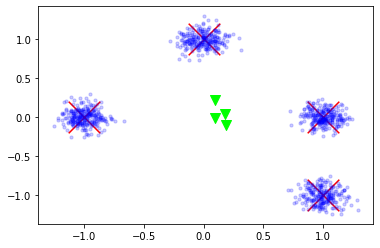

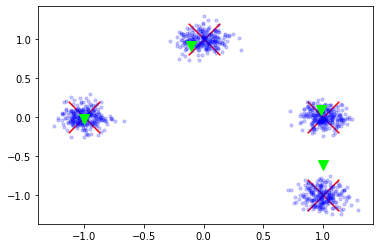

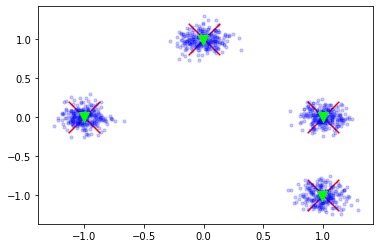

In [56]:
np.random.seed(0)
theta = np.random.randn(4, 2)/10.

x = generate_data(1000)

for i in range(3):
    plt.scatter(*means.T, marker='x', color='r', s=1000)
    plt.scatter(*x.T, marker='o', color=(0, 0, 1., 0.2), s=10)
    plt.scatter(*theta.T, marker='v', color=(0, 1., 0, 1.), s=100)
    plt.show()
    
    dists = np.linalg.norm(theta[:, None, :]-x, axis=-1)
    idx = dists.argmin(axis=0)
    theta = np.stack([x[idx==i].mean(axis=0) for i in range(len(theta))], axis=0)






# k means but with SGD

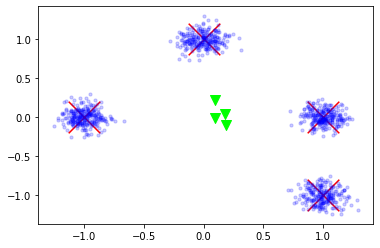

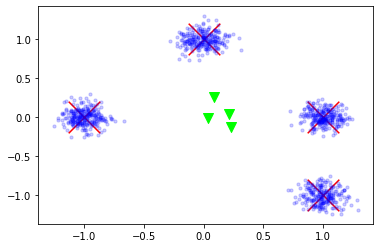

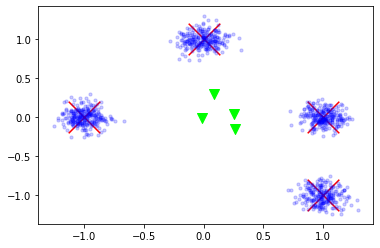

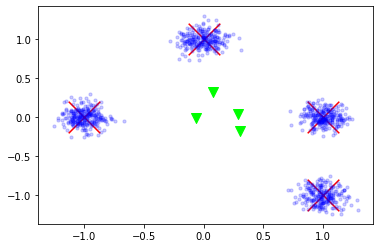

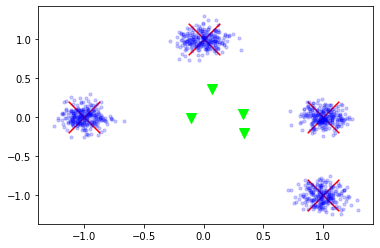

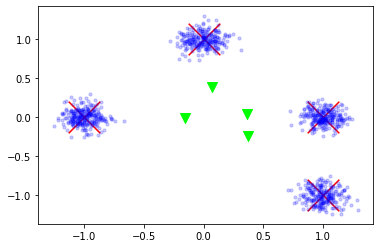

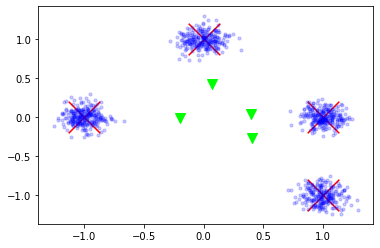

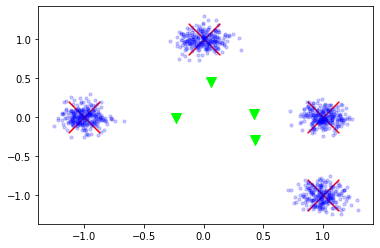

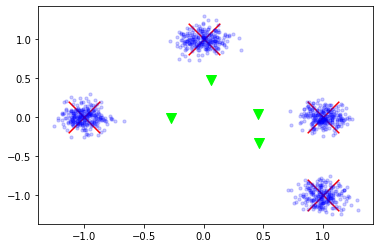

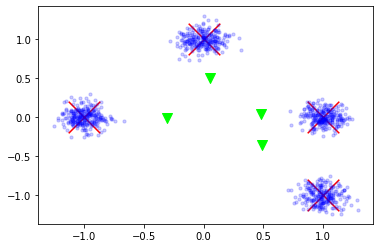

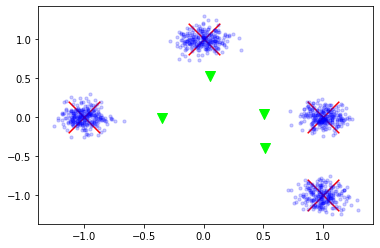

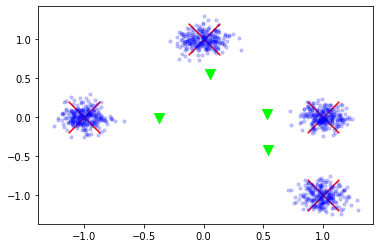

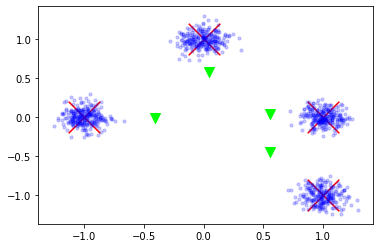

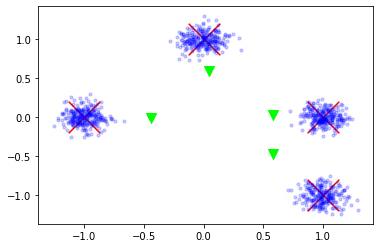

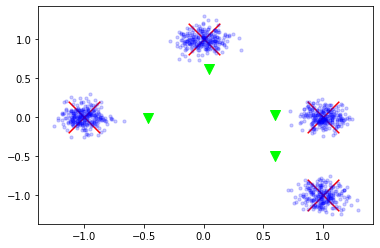

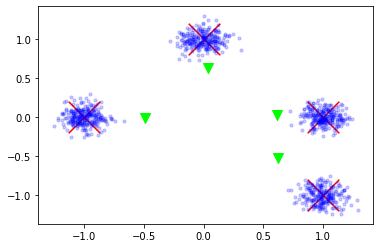

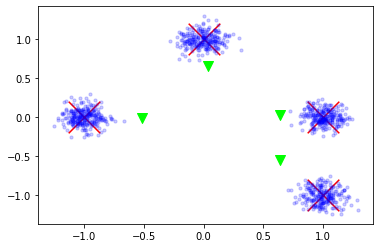

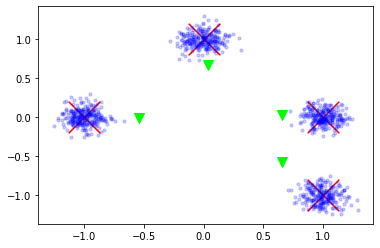

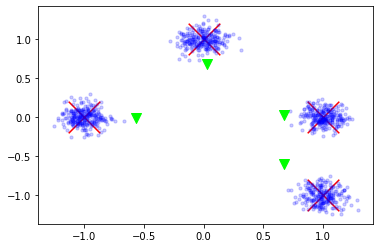

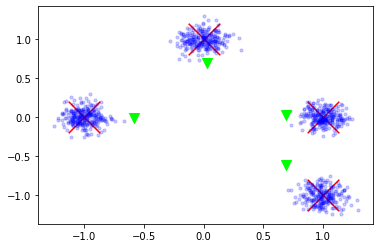

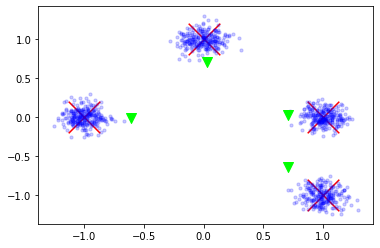

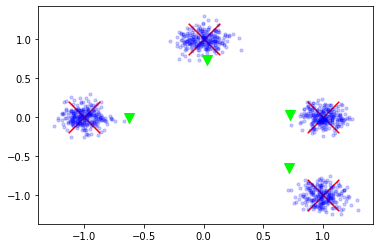

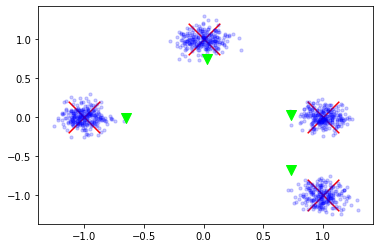

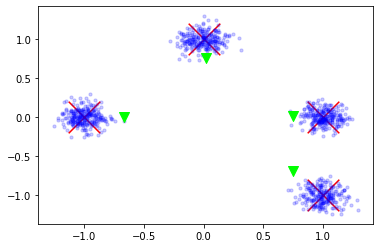

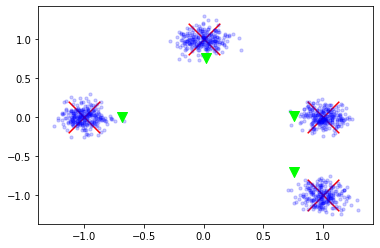

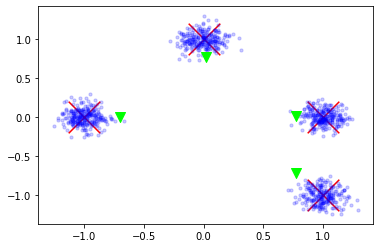

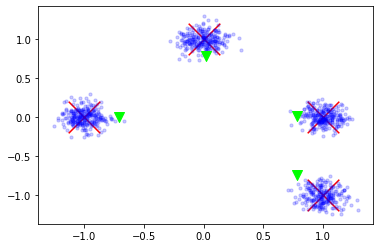

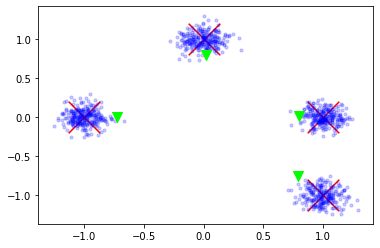

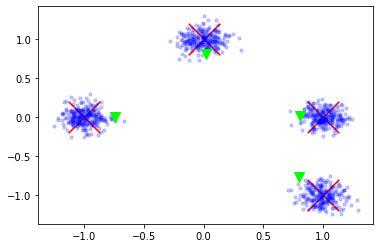

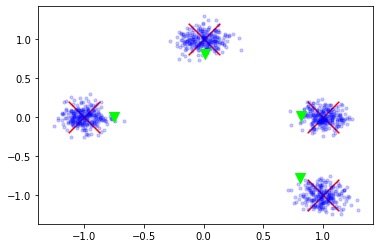

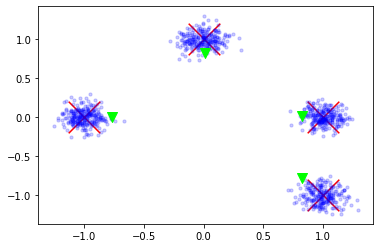

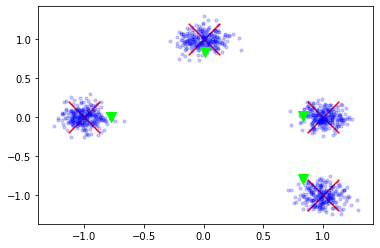

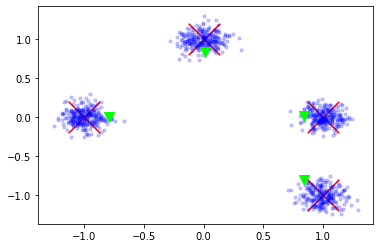

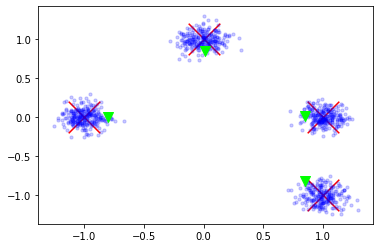

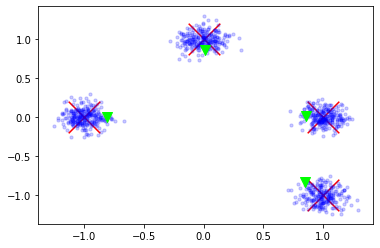

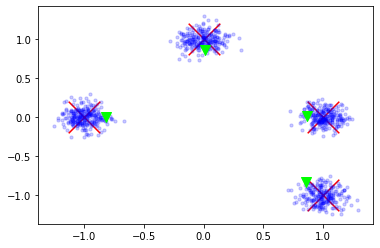

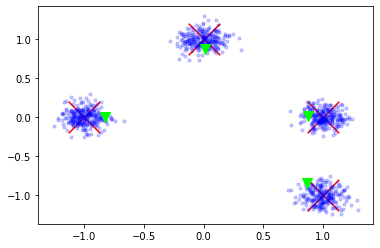

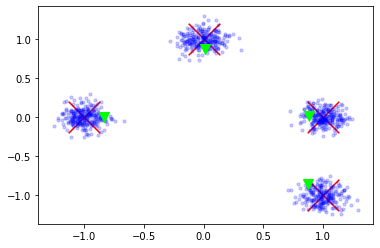

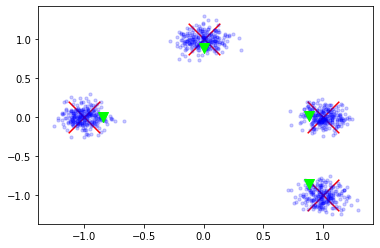

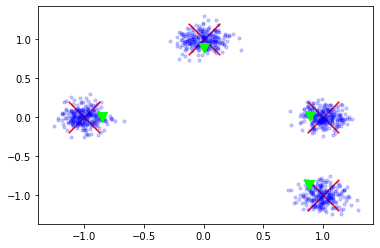

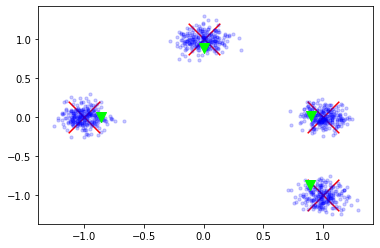

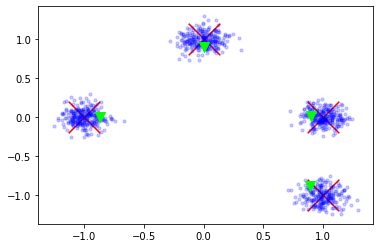

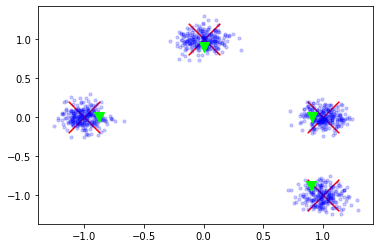

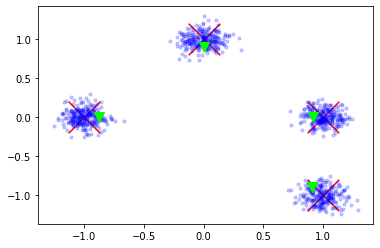

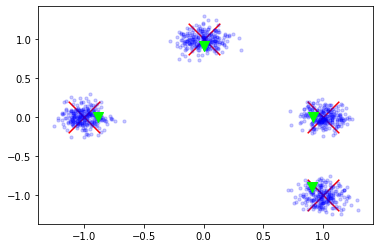

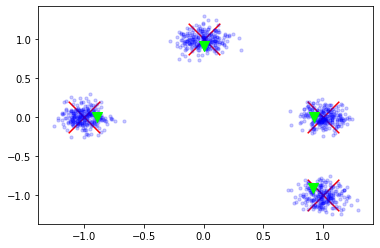

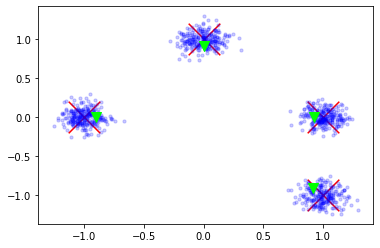

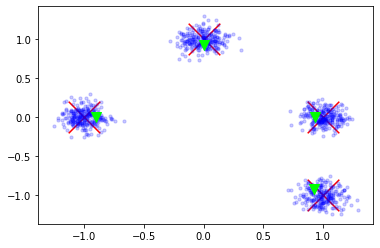

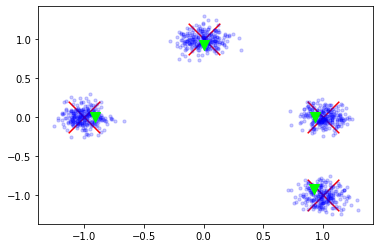

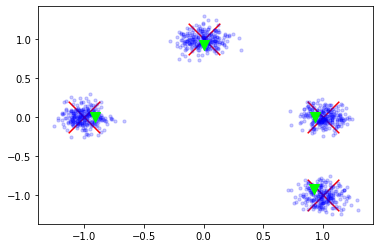

In [59]:
np.random.seed(0)
theta = np.random.randn(4, 2)/10.

x = generate_data(1000)

for i in range(50):
    plt.scatter(*means.T, marker='x', color='r', s=1000)
    plt.scatter(*x.T, marker='o', color=(0, 0, 1., 0.2), s=10)
    plt.scatter(*theta.T, marker='v', color=(0, 1., 0, 1.), s=100)
    plt.show()
    
    dists = np.linalg.norm(theta[:, None, :]-x, axis=-1)
    idx = dists.argmin(axis=0)
    
    alpha = .95
    theta = alpha*theta + (1-alpha)*np.stack([x[idx==i].mean(axis=0) for i in range(len(theta))], axis=0)






now to do with softmax attention movement and using dot product as distance with lots of clusters
and dynamically generating data for each step rather than using fixed dataset